In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
ls

lab_random_variable_distribution_Mary.ipynb
we_fn_use_c_marketing_customer_value_analysis.csv*


In [3]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
#lower columns name.
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols

data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
#Add undescore in the column names
data.columns = data.columns.str.replace(' ' , '_')
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


1. Get the numerical variables from our dataset.

In [44]:
numericals1 = data.select_dtypes(include = np.number)

In [45]:
numericals1.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [46]:
numericals1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

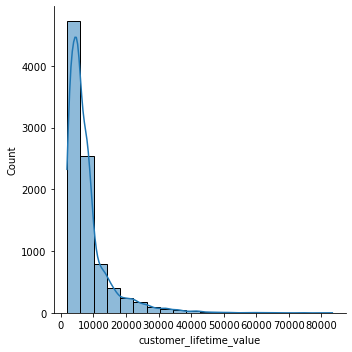

In [26]:
sns.displot(data, x="customer_lifetime_value",bins=20, kde=True)

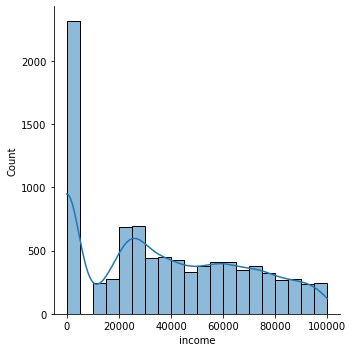

In [27]:
sns.displot(data, x="income",bins=20, kde=True)

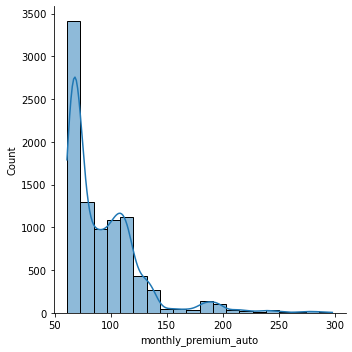

In [28]:
sns.displot(data, x="monthly_premium_auto",bins=20, kde=True)

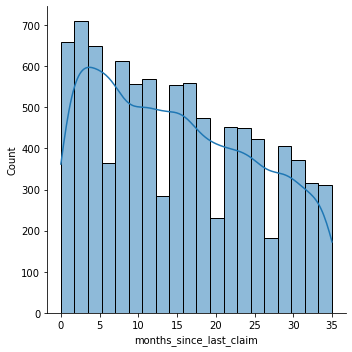

In [29]:
sns.displot(data, x="months_since_last_claim",bins=20, kde=True)

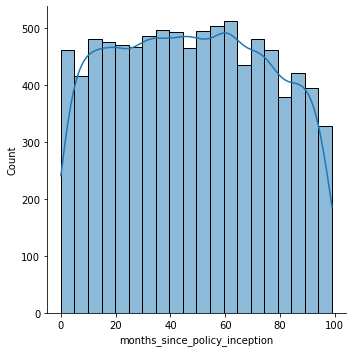

In [25]:
sns.displot(data, x="months_since_policy_inception",bins=20, kde=True)


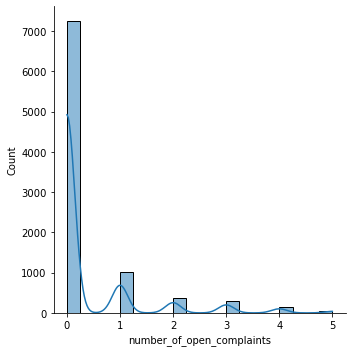

In [30]:
sns.displot(data, x="number_of_open_complaints",bins=20, kde=True)

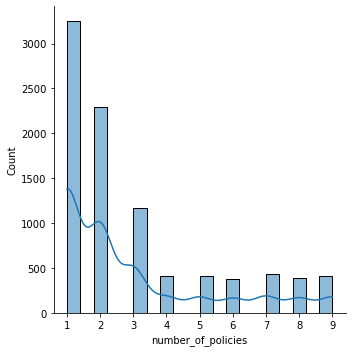

In [31]:
sns.displot(data, x="number_of_policies",bins=20, kde=True)

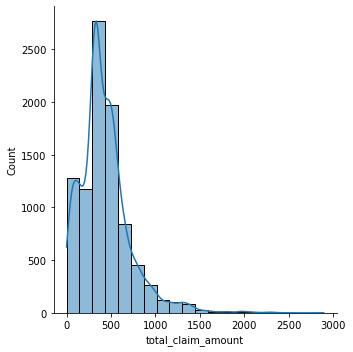

In [32]:
sns.displot(data, x="total_claim_amount",bins=20, kde=True)

Normal distributions are not observed.

The exponential distribution is the probability distribution (a process in which events occur continuously and independently at a constant average rate), so I think that customer_lifetime_value, monthly_premium_auto, number_of_open_complaints and number_of_policies could be an exponential distribution.

In [47]:
# I am going to apply the log transformation to reduce the range

def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

numericals_transform = pd.DataFrame(data = None)
for i in numericals1:
    numericals_transform[i] = numericals1[i].apply(lambda x :log_transfom_clean1(x))




In [48]:
numericals_transform.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,3.441462,4.750308,1.838849,1.505150,0.698970,0.0,0.000000,2.585248
1,3.843827,0.000000,1.973128,1.113943,1.623249,0.0,0.903090,3.053641
2,4.110166,4.688126,2.033424,1.255273,1.579784,0.0,0.301030,2.753179
3,3.883426,0.000000,2.025306,1.255273,1.812913,0.0,0.845098,2.724179
4,3.449277,4.641831,1.863323,1.079181,1.643453,0.0,0.000000,2.140291


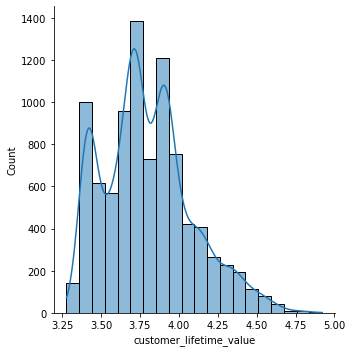

In [49]:
sns.displot(numericals_transform, x="customer_lifetime_value",bins=20, kde=True)

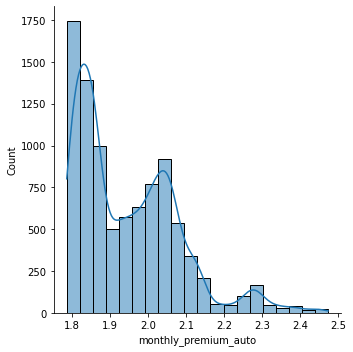

In [50]:
sns.displot(numericals_transform, x="monthly_premium_auto",bins=20, kde=True)

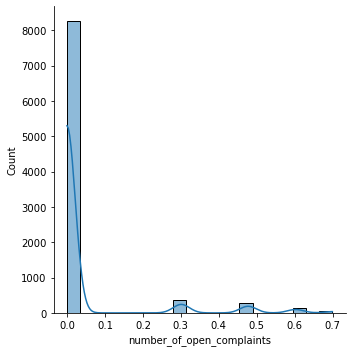

In [51]:
sns.displot(numericals_transform, x="number_of_open_complaints",bins=20, kde=True)

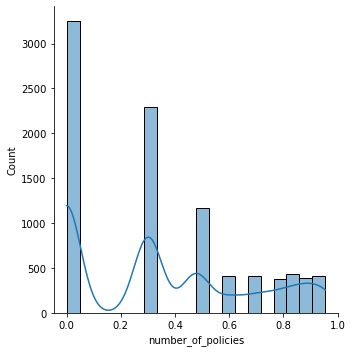

In [52]:
sns.displot(numericals_transform, x="number_of_policies",bins=20, kde=True)

Now, monthly_premium_auto it is more close to normal distribution.

In [53]:
numericals_transform.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,3.799452,0.283559,3.278298,3.601435,3.761942,3.952413,4.920777
income,9134.0,3.466299,2.031283,0.000000,0.000000,4.530065,4.794627,4.999917
monthly_premium_auto,9134.0,1.946651,0.133766,1.785330,1.832509,1.919078,2.037426,2.474216
months_since_last_claim,9134.0,1.027120,0.430018,0.000000,0.778151,1.146128,1.361728,1.544068
months_since_policy_inception,9134.0,1.550914,0.420037,0.000000,1.380211,1.681241,1.851258,1.995635
number_of_open_complaints,9134.0,0.041685,0.134761,0.000000,0.000000,0.000000,0.000000,0.698970
number_of_policies,9134.0,0.347900,0.321127,0.000000,0.000000,0.301030,0.602060,0.954243
total_claim_amount,9134.0,2.514750,0.398051,-1.004334,2.434981,2.584270,2.738396,3.461384


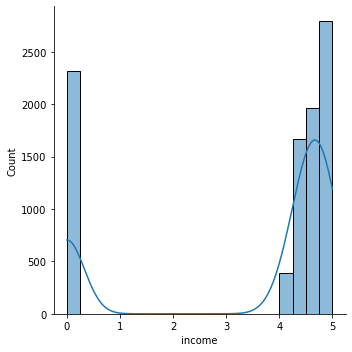

In [54]:
sns.displot(numericals_transform, x="income",bins=20, kde=True)

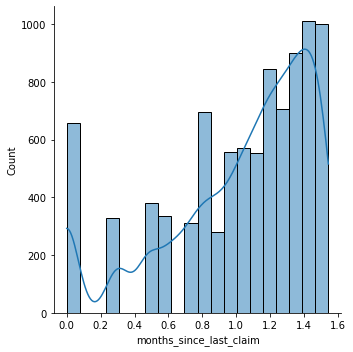

In [55]:
sns.displot(numericals_transform, x="months_since_last_claim",bins=20, kde=True)

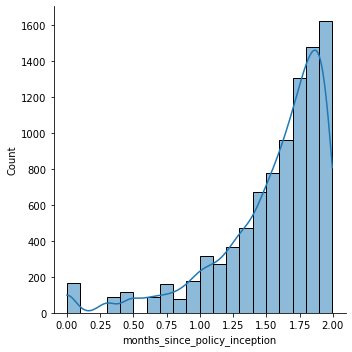

In [57]:
sns.displot(numericals_transform, x="months_since_policy_inception",bins=20, kde=True)

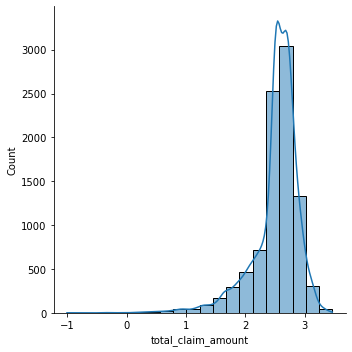

In [58]:
sns.displot(numericals_transform, x="total_claim_amount",bins=20, kde=True)

Also, The total_claim_amount is more closely to a normal distribution.

In [59]:
X_all = numericals1.copy()
scaler = MinMaxScaler()
scaler.fit(X_all)
x_normalized_all= scaler.transform(X_all)
X_normalized_all_df = pd.DataFrame(x_normalized_all, columns=X_all.columns)
y_all = numericals1['total_claim_amount']

In [63]:
X_normalized_all_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [67]:
transformer = StandardScaler()
transformer.fit(numericals1)

x_standardized = transformer.transform(numericals1)
print("Standarized: ",x_standardized.shape)
pd.DataFrame(x_standardized, columns=numericals1.columns)

Standarized:  (9134, 8)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113
